In [798]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import pandas 
import numpy as np
import iris
import iris.plot as iplt


In [799]:
##Plot reefs of the world 
def plot_reefs(lon, lat):
    #Made bigger
    fig = plt.figure(figsize=(21,7))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ##Add some features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.BORDERS)
    ##Add ocean with topography
    ax.stock_img()
    ##Add textbox 
    bbox_props = dict(boxstyle="square", fc="white", ec="black", lw=2)

    ax.text(85, -80, 'Coral Reefs of the World', transform=ccrs.Geodetic(), size=15,
            bbox=bbox_props)
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1.5, color='gray', alpha=0.5, linestyle='--')
    #Reduced the amount of lon and lat that appear in the map 
    gl.xlocator = mticker.FixedLocator([-181,-180,-135,-90, -45, 0, 45,90,135, 180])
    gl.ylocator = mticker.FixedLocator([ -90,-45, 0, 45,90])
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size': 10, 'color': 'black'}
    #Changed reefs to blue
    plt.plot(lon, lat, 'bo',markersize=1)
    
    return fig


In [800]:
csv_fil = '/Users/isarios/Hollings_Docs/Hollings/Hollings_2020/ReefLocations.csv'

In [801]:
df = pandas.read_csv(csv_fil,encoding= 'unicode_escape')

In [802]:
df

,ID,REGION,SUBREGION,COUNTRY,LOCATION,LAT,LON,REEF_SYSTEM,REEF_TYPE,REEF_NAME,WATER_DEPTH,ISLAND_NAME,PROTECTED,TOURISM,COUNTRY_CODE
0,33,NaN,NaN,NaN,NaN,0.21667,-176.48333,Baker Island,Fringing,Baker Island,NaN,NaN,1,0,NaN
1,7976,NaN,NaN,NaN,NaN,0.03333,6.66667,Spo TomT and Prfncipe,Non-reef coral community,Spo TomT and Prfncipe,NaN,NaN,0,0,NaN
2,3575,NaN,NaN,NaN,NaN,27.95000,-82.95000,Clearwater,NaN,Clearwater,NaN,NaN,0,1,NaN
3,10302,NaN,NaN,NaN,NaN,28.88333,34.73333,Gulf of Aqaba,NaN,Gulf of Aqaba,NaN,NaN,0,0,NaN
4,3948,NaN,NaN,NaN,NaN,26.88333,-82.56667,Crystal River,NaN,Crystal River,NaN,NaN,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10043,8289,Pacific,Southwest Pacific,Vanuatu,Torres Islands,-13.40000,166.60000,Loh,Fringing,Loh,NaN,NaN,0,0,VUT
10044,8290,Pacific,Southwest Pacific,Vanuatu,Torres Islands,-13.33333,166.65000,Linua,Fringing,Linua,NaN,NaN,0,0,VUT
10045,8291,Pacific,Southwest Pacific,Vanuatu,Torres Islands,-13.31667,166.56667,Tegua,Fringing,Tegua,NaN,NaN,0,0,VUT
10046,8292,Pacific,Southwest Pacific,Vanuatu,Torres Islands,-13.25000,166.63333,Metoma,Fringing,Metoma,NaN,NaN,0,0,VUT


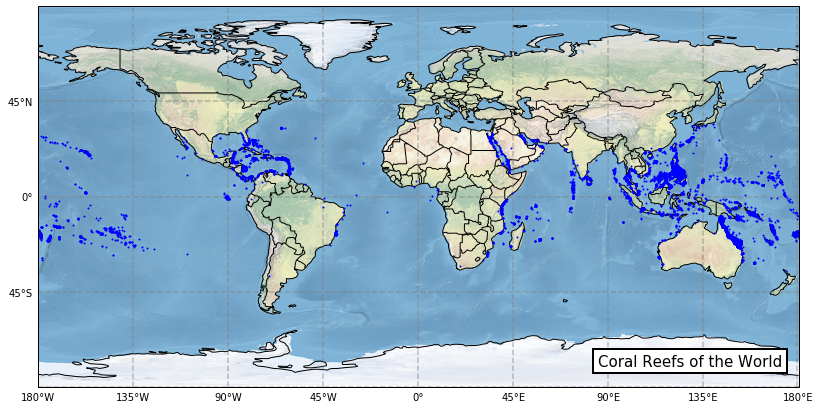

In [803]:
fig = plot_reefs(df['LON'],df['LAT'])
plt.show()

In [804]:
df2=df.loc[(df['LON']>=-120)&(df['LON']<=-60)&(df['LAT']>=-10)]

In [805]:
df2

,ID,REGION,SUBREGION,COUNTRY,LOCATION,LAT,LON,REEF_SYSTEM,REEF_TYPE,REEF_NAME,WATER_DEPTH,ISLAND_NAME,PROTECTED,TOURISM,COUNTRY_CODE
2,3575,NaN,NaN,NaN,NaN,27.95000,-82.95000,Clearwater,NaN,Clearwater,NaN,NaN,0,1,NaN
4,3948,NaN,NaN,NaN,NaN,26.88333,-82.56667,Crystal River,NaN,Crystal River,NaN,NaN,0,1,NaN
5,1352,NaN,NaN,NaN,NaN,26.06667,-80.06667,John U. Lloyd,NaN,John U. Lloyd,NaN,NaN,1,0,NaN
6,10670,NaN,NaN,NaN,NaN,26.70033,-80.01667,NaN,NaN,Breakers Reef,NaN,NaN,0,0,NaN
7,9101,NaN,NaN,NaN,NaN,24.85000,-80.56667,Florida Reef Tract,Patch Reef,Hens and Chickens,NaN,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,300,Americas,U.S. Caribbean,Puerto Rico,Puerto Rico,17.86667,-66.43333,Puerto Rico,Fringing,Puerto Rico,NaN,Puerto Rico,0,1,PRI
1792,4342,Americas,U.S. Caribbean,Puerto Rico,San Juan,18.46667,-66.10000,Puerto Rico,Fringing,San Juan,NaN,Puerto Rico,0,1,PRI
1793,1636,Americas,U.S. Caribbean,Puerto Rico,Vieques,18.10000,-65.40000,Vieques Island,Fringing,Vieques Island,50.0,Puerto Rico,0,1,PRI
2045,3545,Asia,South Asia,India,NaN,8.93333,-79.00000,Gulf of Mannar,NaN,May Reef,NaN,NaN,0,0,IND


In [806]:
def plot_reefs2(lon, lat):
    fig = plt.figure(figsize=(21,7))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.BORDERS)
    bbox_props = dict(boxstyle="square", fc="white", ec="black", lw=2)

    ax.text(-76,0, 'Caribbean Coral Reefs', transform=ccrs.Geodetic(), size=15,
            bbox=bbox_props)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1.5, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlocator = mticker.FixedLocator([-120,-110,-90,-60,-50])
    gl.ylocator = mticker.FixedLocator([-20,0,20,40,60,80])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size': 10, 'color': 'black'}
    plt.plot(lon, lat, 'bo',markersize=2)
    
    return fig

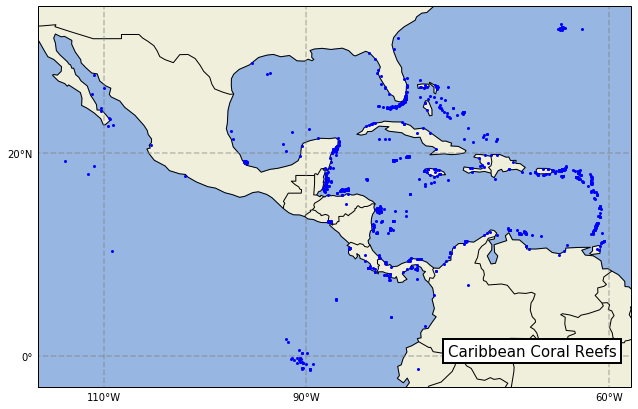

In [807]:
fig = plot_reefs2(df2['LON'],df2['LAT'])
plt.show()


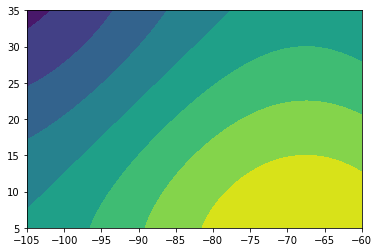

In [808]:
##Section of the caribbean
lon = np.linspace(-105, -60)
lat = np.linspace(5, 35)
lon2d, lat2d = np.meshgrid(lon, lat)
data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)
plt.contourf(lon2d, lat2d, data)

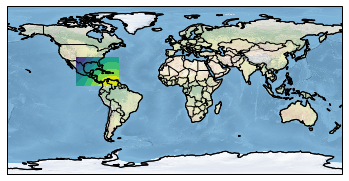

In [809]:
##Section of the caribbean on top of the map 
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS)
ax.stock_img()
ax.contourf(lon, lat, data)